In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_prediction.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
#lets check the datatypes of all columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#Lets check the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#Lets drop Loan_ID as it shows no importance
df.drop(['Loan_ID'],axis=1,inplace=True)

In [7]:
#lets check some value counts
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [8]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
#Lets go ahead to play with categorical values

gender = pd.get_dummies(df['Gender'],drop_first=True)

education = pd.get_dummies(df['Education'],drop_first=True)

property_area = pd.get_dummies(df['Property_Area'],drop_first=True)

In [12]:
#Lets concat this all columns
df = pd.concat([df,gender,education,property_area],axis=1)
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Not Graduate,Semiurban,Urban
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,0,0,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,1,1,0,1
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1,0,1,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,1,0,0,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1,0,1,0


In [13]:
#Lets drop the remaining columns
df.drop(['Gender','Education','Property_Area'],axis=1,inplace=True)

In [14]:
df.head(10)

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Semiurban,Urban
0,No,0,No,5849,0.0,NaN,360.0,1.0,Y,1,0,0,1
1,Yes,1,No,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0
2,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Y,1,0,0,1
3,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1
4,No,0,No,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1
5,Yes,2,Yes,5417,4196.0,267.0,360.0,1.0,Y,1,0,0,1
6,Yes,0,No,2333,1516.0,95.0,360.0,1.0,Y,1,1,0,1
7,Yes,3+,No,3036,2504.0,158.0,360.0,0.0,N,1,0,1,0
8,Yes,2,No,4006,1526.0,168.0,360.0,1.0,Y,1,0,0,1
9,Yes,1,No,12841,10968.0,349.0,360.0,1.0,N,1,0,1,0


In [15]:
#Lets check the value counts
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
married = pd.get_dummies(['Married'],drop_first=True)

In [20]:
df = pd.concat([df,married],axis=1)
df.head(10)

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Semiurban,Urban
0,No,0,No,5849,0.0,NaN,360.0,1.0,Y,1,0,0,1
1,Yes,1,No,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0
2,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Y,1,0,0,1
3,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1
4,No,0,No,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1
5,Yes,2,Yes,5417,4196.0,267.0,360.0,1.0,Y,1,0,0,1
6,Yes,0,No,2333,1516.0,95.0,360.0,1.0,Y,1,1,0,1
7,Yes,3+,No,3036,2504.0,158.0,360.0,0.0,N,1,0,1,0
8,Yes,2,No,4006,1526.0,168.0,360.0,1.0,Y,1,0,0,1
9,Yes,1,No,12841,10968.0,349.0,360.0,1.0,N,1,0,1,0


In [21]:
df.drop(['Married'],axis=1,inplace=True)

In [22]:
df.head(10)

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Semiurban,Urban
0,0,No,5849,0.0,NaN,360.0,1.0,Y,1,0,0,1
1,1,No,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,Y,1,0,0,1
3,0,No,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1
4,0,No,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1
5,2,Yes,5417,4196.0,267.0,360.0,1.0,Y,1,0,0,1
6,0,No,2333,1516.0,95.0,360.0,1.0,Y,1,1,0,1
7,3+,No,3036,2504.0,158.0,360.0,0.0,N,1,0,1,0
8,2,No,4006,1526.0,168.0,360.0,1.0,Y,1,0,0,1
9,1,No,12841,10968.0,349.0,360.0,1.0,N,1,0,1,0


In [30]:
self_employeed = pd.get_dummies(df['Self_Employed'],drop_first=True)

In [31]:
df = pd.concat([df,self_employeed],axis=1)

In [32]:
df.head(10)

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Semiurban,Urban,Yes
0,0,No,5849,0.0,NaN,360.0,1.0,Y,1,0,0,1,0
1,1,No,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,Y,1,0,0,1,1
3,0,No,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1,0
4,0,No,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1,0
5,2,Yes,5417,4196.0,267.0,360.0,1.0,Y,1,0,0,1,1
6,0,No,2333,1516.0,95.0,360.0,1.0,Y,1,1,0,1,0
7,3+,No,3036,2504.0,158.0,360.0,0.0,N,1,0,1,0,0
8,2,No,4006,1526.0,168.0,360.0,1.0,Y,1,0,0,1,0
9,1,No,12841,10968.0,349.0,360.0,1.0,N,1,0,1,0,0


In [33]:
df.drop(['Self_Employed'],axis=1,inplace=True)

In [34]:
df.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Semiurban,Urban,Yes
0,0,5849,0.0,NaN,360.0,1.0,Y,1,0,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,1,0,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1,0
5,2,5417,4196.0,267.0,360.0,1.0,Y,1,0,0,1,1
6,0,2333,1516.0,95.0,360.0,1.0,Y,1,1,0,1,0
7,3+,3036,2504.0,158.0,360.0,0.0,N,1,0,1,0,0
8,2,4006,1526.0,168.0,360.0,1.0,Y,1,0,0,1,0
9,1,12841,10968.0,349.0,360.0,1.0,N,1,0,1,0,0


In [35]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [36]:
#Lets change the 3+ value into 3 
df1 = df['Dependents'].replace("3+",3)

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [40]:
df.replace("3+",3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Semiurban,Urban,Yes,Married
0,0,5849,0.0,NaN,360.0,1.0,Y,1,0,0,1,0,No
1,1,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0,0,1
2,0,3000,0.0,66.0,360.0,1.0,Y,1,0,0,1,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,Y,0,0,0,0,0,No
610,3,4106,0.0,40.0,180.0,1.0,Y,1,0,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,Y,1,0,0,1,0,1
612,2,7583,0.0,187.0,360.0,1.0,Y,1,0,0,1,0,1


In [41]:
df.drop(['Married'],axis=1,inplace=True)

In [42]:
df.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Semiurban,Urban,Yes
0,0,5849,0.0,NaN,360.0,1.0,Y,1,0,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,1,0,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1,0
5,2,5417,4196.0,267.0,360.0,1.0,Y,1,0,0,1,1
6,0,2333,1516.0,95.0,360.0,1.0,Y,1,1,0,1,0
7,3+,3036,2504.0,158.0,360.0,0.0,N,1,0,1,0,0
8,2,4006,1526.0,168.0,360.0,1.0,Y,1,0,0,1,0
9,1,12841,10968.0,349.0,360.0,1.0,N,1,0,1,0,0


In [44]:
df.replace("3+",3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Semiurban,Urban,Yes
0,0,5849,0.0,NaN,360.0,1.0,Y,1,0,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,1,0,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,Y,0,0,0,0,0
610,3,4106,0.0,40.0,180.0,1.0,Y,1,0,0,0,0
611,1,8072,240.0,253.0,360.0,1.0,Y,1,0,0,1,0
612,2,7583,0.0,187.0,360.0,1.0,Y,1,0,0,1,0


In [47]:
df2 = df.replace("Y",1)

In [49]:
df3 = df2.replace("N",0)

In [50]:
df3.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Semiurban,Urban,Yes
0,0,5849,0.0,NaN,360.0,1.0,1,1,0,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,1,0
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,0,1,1
6,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,1,0
7,3+,3036,2504.0,158.0,360.0,0.0,0,1,0,1,0,0
8,2,4006,1526.0,168.0,360.0,1.0,1,1,0,0,1,0
9,1,12841,10968.0,349.0,360.0,1.0,0,1,0,1,0,0


In [51]:
df4 = df3.replace("3+",3)
df4.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Semiurban,Urban,Yes
0,0,5849,0.0,NaN,360.0,1.0,1,1,0,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,1,0
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,0,1,1
6,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,1,0
7,3,3036,2504.0,158.0,360.0,0.0,0,1,0,1,0,0
8,2,4006,1526.0,168.0,360.0,1.0,1,1,0,0,1,0
9,1,12841,10968.0,349.0,360.0,1.0,0,1,0,1,0,0


In [53]:
df4.fillna(0 , inplace=True)

In [54]:
df4.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Semiurban,Urban,Yes
0,0,5849,0.0,0.0,360.0,1.0,1,1,0,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,1,0
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,0,1,1
6,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,1,0
7,3,3036,2504.0,158.0,360.0,0.0,0,1,0,1,0,0
8,2,4006,1526.0,168.0,360.0,1.0,1,1,0,0,1,0
9,1,12841,10968.0,349.0,360.0,1.0,0,1,0,1,0,0


In [57]:
df4.dtypes

Dependents            object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status            int64
Male                   int64
Not Graduate           int64
Semiurban              int64
Urban                  int64
Yes                    int64
dtype: object

In [58]:
#As Dependents dont show some importance
df4.drop(['Dependents'],axis=1,inplace=True)

In [61]:
df = df4

In [62]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Semiurban,Urban,Yes
0,5849,0.0,0.0,360.0,1.0,1,1,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,0,0,1,0
612,7583,0.0,187.0,360.0,1.0,1,1,0,0,1,0


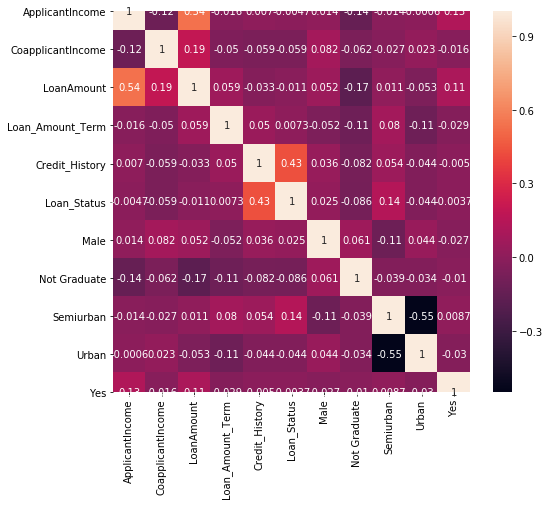

In [69]:
#lets check the correlation of the columns by heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#after checking we can see that 1 value is completely diagonal 
#so the heatmap shows columns are completely correlated with each other.

In [63]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(614, 11)
(568, 11)


In [64]:
#lets separate x and y
df_x = df_final.drop(columns=["Loan_Status"],axis=1)
y = df_final[["Loan_Status"]]

In [65]:
#lets do Standar Scaling to scaled a data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [66]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [67]:
print(y_train.shape,y_test.shape)

(454, 1) (114, 1)


In [68]:
#lets create an objects for the models
KNN = KNeighborsClassifier(n_neighbors=6)
SV = SVC()
LR = LogisticRegression()
DT = DecisionTreeClassifier(random_state=6)
GNB = GaussianNB()

In [70]:
models = []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [71]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [72]:
from sklearn.model_selection import cross_val_score

*************************** KNeighborsClassifier *******************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy Score 0.6842105263157895


cross_val_score =  0.7392122547748683


roc_auc_curve 0.622093023255814


classification_report               precision    recall  f1-score   support

           0       0.39      0.50      0.44        28
           1       0.82      0.74      0.78        86

    accuracy                           0.68       114
   macro avg       0.60      0.62      0.61       114
weighted avg       0.71      0.68      0.70       114



[[14 14]
 [22 64]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** SVC *******************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    ker

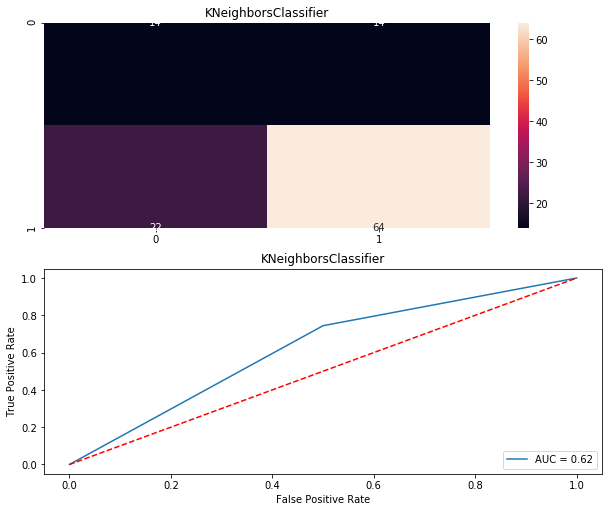

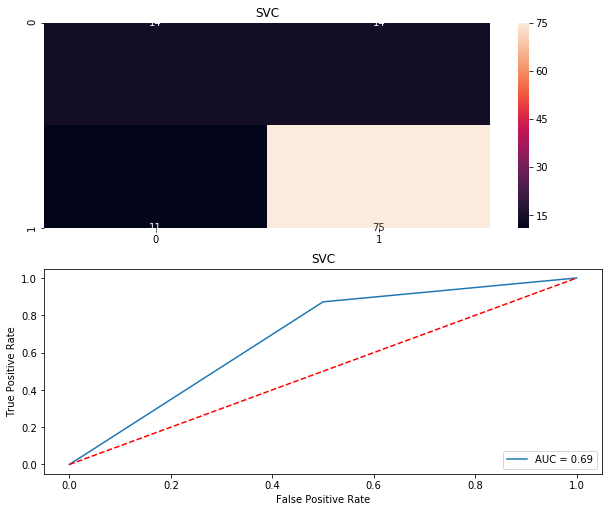

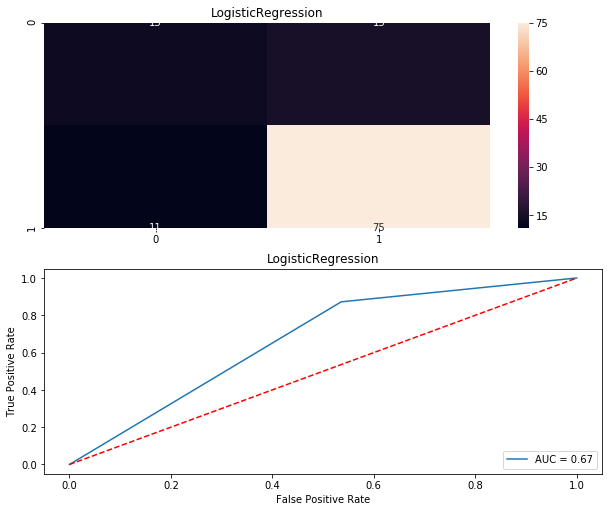

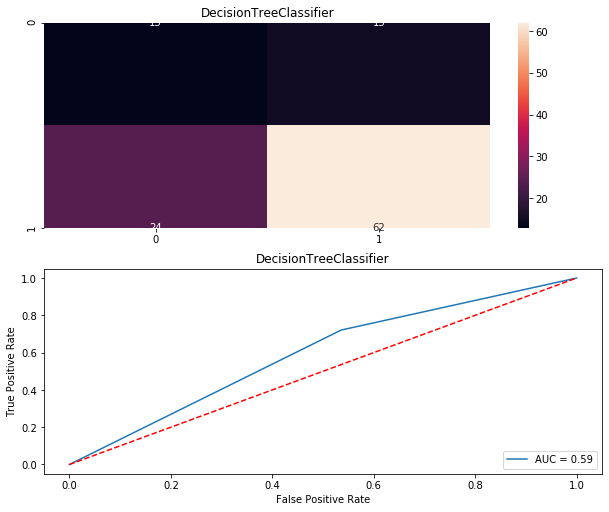

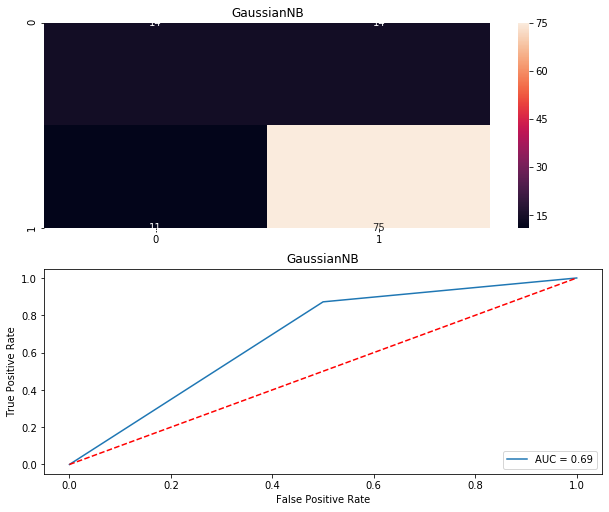

In [73]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('***************************',name,'*******************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy Score',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print('roc_auc_curve',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label = 'AUC = %0.2f' %roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

In [74]:
result = pd.DataFrame({'Model':Model ,'Accuracy_score':score, 'Cross val Score':cvs ,'Roc auc curve':rocscore})
result

,Model,Accuracy_score,Cross val Score,Roc auc curve
0,KNeighborsClassifier,68.421053,73.921225,62.209302
1,SVC,78.070175,77.464675,68.604651
2,LogisticRegression,77.192982,77.643138,66.818937
3,DecisionTreeClassifier,65.789474,68.505855,59.260797
4,GaussianNB,78.070175,76.590182,68.604651


# I will choose SVC for this model as it is giving higher accuracy¶

In [75]:
from sklearn.externals import joblib

In [76]:
joblib.dump(SV , 'model_adultDataset.pkl')

['model_adultDataset.pkl']

In [77]:
model.predict(x_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1], dtype=int64)